In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
def linear_costs(x, y, z, theta):
    costs = (np.matmul(x,theta)-z)*(1-2*y)
    return costs

In [3]:
def paired_classifier(x, costs):
    f = []
    for cost in costs.T:
        f.append(LinearRegression().fit(x, cost))
    return f

In [22]:
def obj_grad(objective, x, z, theta, n):
    if objective=='MSE':
        grad = 2*np.matmul(x.T,np.matmul(x,theta)-z)/n
        return grad.flatten()
    elif objective=='dot_product':
        grad = np.matmul(x.T,z)/n
        return grad.flatten()
    else:
        return 0

In [23]:
def linear_proxies(x, y, z_all, C, iters, n, K, objective=None):
    theta_list = []
    grad_list = []
    for k in range(0,K):
        z = z_all[:,k].reshape(-1,1)
        zhat = LinearRegression().fit(x, z)
        theta = [np.transpose(zhat.coef_)]
        grad_l = []
        for t in range(1, iters):
            costs = linear_costs(x, y, z, theta[t-1])
            f_s = paired_classifier(x, costs)
            val = []
            h= [0]*n
            for i, f in enumerate(f_s):
                h_s = f.predict(x)
                h[i] = h_s < 0
                val.append(np.sum(h_s[h[i]]))
            y_index = np.argmin(val)
            y_temp = y[:,y_index]
            h = h[y_index].astype(int)
            if np.abs(np.sum(np.matmul(x,theta[t-1]))/np.sum(z) - 1) >= np.abs(np.matmul((np.matmul(x,theta[t-1])-z).T,np.abs(h-y_temp))):
                penalty = np.sign(np.sum(np.matmul(x,theta[t-1]))/np.sum(z) - 1) * np.sum(x, axis=0)/np.sum(z)
            else:
                penalty = -np.sign(np.matmul(np.transpose(np.matmul(x,theta[t-1])-z),np.abs(h-y_temp))) * np.matmul(np.transpose(x),np.abs(h-y_temp))  
                penalty = penalty.flatten()
            grad_l.append(obj_grad(objective,x,z,theta[t-1],n) - C * penalty) 
            theta.append(theta[t-1] - (np.power(t, -1/2) * grad_l[t-1]).reshape(-1,1))
        theta_list.append(theta)
        grad_list.append(grad_l)
    return theta_list, grad_list

In [ ]:
#np.random.seed(1)
n = 100
m = 3
K = 3
d = 2
intercept = np.ones(n).reshape(-1,1)
x_train = np.random.rand(n,d)
x_train = np.hstack((intercept, x_train))
y_train = np.round(np.random.rand(n,m))
z_train = np.round(np.random.rand(n,K))

coefficients, gradients = linear_proxies(x_train, y_train, z_train, 1, 10000, n, K, objective='dot_product')

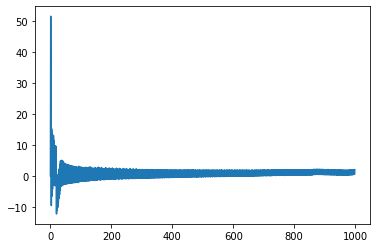

In [25]:
coefficients_0 = [row[0] for row in coefficients[0]]
plt.plot(coefficients_0)

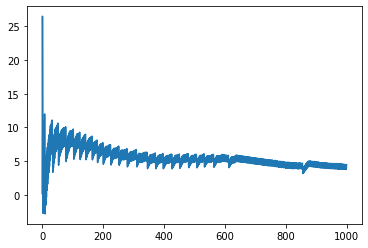

In [27]:
coefficients_1 = [row[2] for row in coefficients[1]]
plt.plot(coefficients_1)

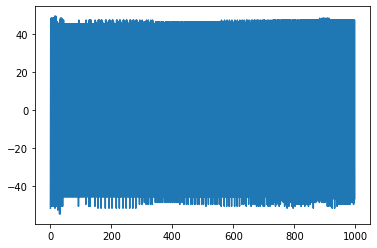

In [28]:
gradients_0 = [row[0] for row in gradients[0]]
plt.plot(gradients_0)

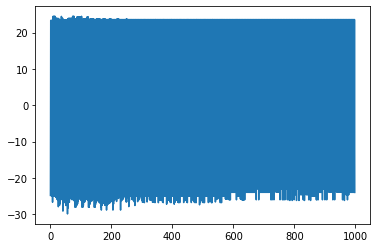

In [29]:
gradients_1 = [row[1] for row in gradients[1]]
plt.plot(gradients_1)